In [36]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

plt.rcParams['mathtext.fontset'] = 'custom' 
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans' 
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic' 
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold' 
plt.rcParams['font.size'] = 16 
plt.rcParams['mathtext.fontset'] = 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral' 

palette = sns.color_palette('tab10')

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
ind_cls = [np.where(y_train == i)[0] for i in np.unique(y_train)]

In [9]:
x_train.shape

(60000, 28, 28)

In [20]:
X = []
y = []

ind_cls = [np.where(y_train == i)[0] for i in np.unique(y_train)]
for ind in ind_cls:
    X.append(x_train[ind[:500]].reshape(-1, 28 * 28))
    y.append(y_train[ind[:500]])

X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)

In [23]:
tsne = TSNE()
Z = tsne.fit_transform(X)

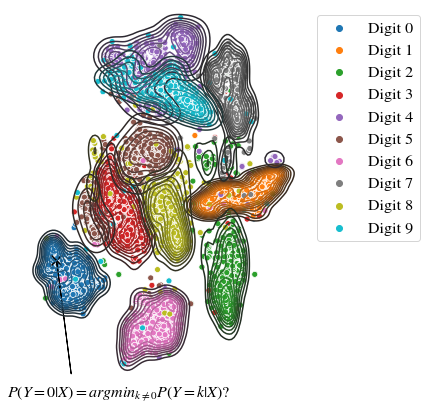

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(Z[:, 0], Z[:, 1], ['Digit ' + str(yi) for yi in y], ax=ax, palette=palette)

for i in range(10):
    sns.kdeplot(Z[np.where(y == i)[0], 0],
                Z[np.where(y == i)[0], 1],
                color=palette[i],
                ax=ax)


    
rand_sample = np.random.choice(np.where(y == 0)[0])
ax.scatter(Z[rand_sample, 0], Z[rand_sample, 1], s=100, marker='x', c='k')
ax.arrow(-60, -80, dx=Z[rand_sample, 0] + 60, dy=Z[rand_sample, 1] + 80)
ax.text(-30, -90, s=r"$P(Y=0|X) = argmin_{k \neq 0}P(Y=k|X)?$", horizontalalignment='center')
ax.set_ylim([-93, 80])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(bbox_to_anchor=(1, 1))
ax.axis('off')

plt.tight_layout()
plt.savefig('../Figures/MNIST_KDE.svg')